**Sahaj Shrestha**
MSCS 634-M40 Advanced Big Data and Data Mining
Lab Assignment 2: KNN vs RNN Algorithms

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Basic exploration
print(X.head())
print("\nTarget class distribution:\n", pd.Series(y).value_counts())

# Standardize dataset using z-score normalization - using fit_transform
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluation Metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Adjusted Rand Index (ARI):", kmeans_ari)


K-Means Silhouette Score: 0.2848589191898987
K-Means Adjusted Rand Index (ARI): 0.8974949815093207


K-Medoids Silhouette Score: 0.26597740204536796
K-Medoids Adjusted Rand Index (ARI): 0.7263406645756675


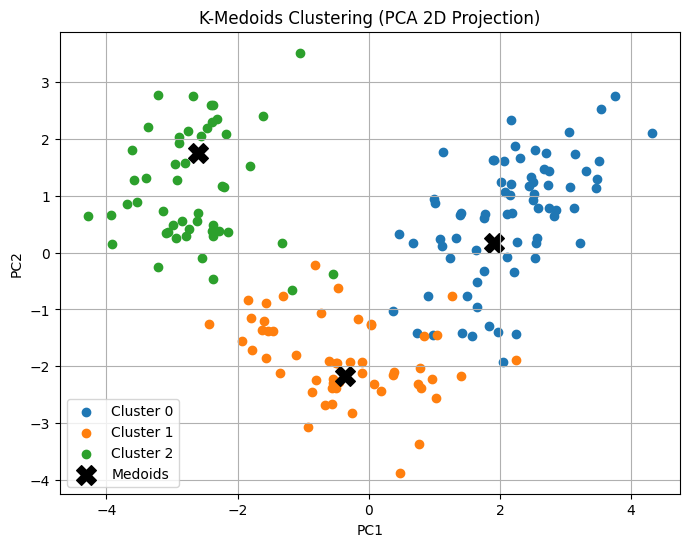

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and scale data
data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate distance matrix
distance_matrix = calculate_distance_matrix(X_scaled)

# Initialize medoids (random 3 indices)
np.random.seed(42)
initial_medoids = np.random.choice(len(X_scaled), 3, replace=False).tolist()

# Apply K-Medoids using pyclustering
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()

# Get clusters and medoids
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Convert clusters to labels
labels = np.zeros(len(X_scaled), dtype=int)
for i, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = i

# Evaluate performance
sil_score = silhouette_score(X_scaled, labels)
ari_score = adjusted_rand_score(y, labels)

print("K-Medoids Silhouette Score:", sil_score)
print("K-Medoids Adjusted Rand Index (ARI):", ari_score)

# Plot the result using first 2 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
medoid_points = X_pca[medoids]

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
plt.scatter(medoid_points[:, 0], medoid_points[:, 1], c='black', s=200, marker='X', label='Medoids')
plt.title("K-Medoids Clustering (PCA 2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()



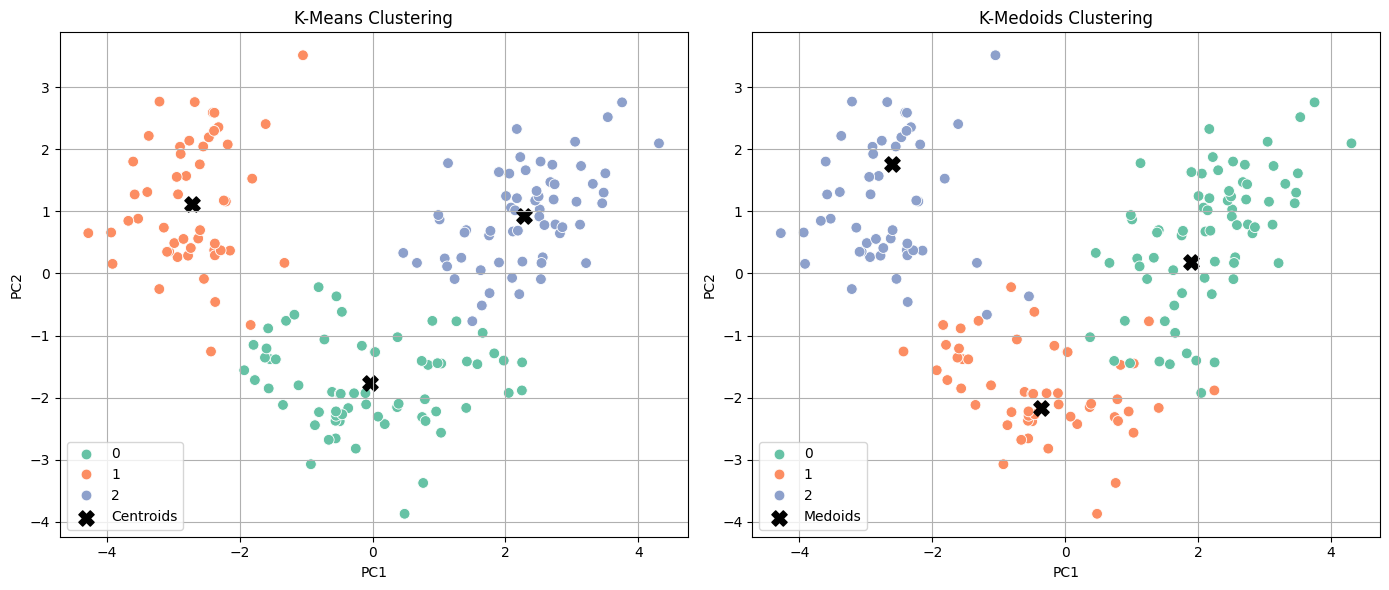

In [ ]:
# K-Means centroids in PCA space
kmeans_centroids_pca = pca.transform(kmeans.cluster_centers_)

# Start plotting
plt.figure(figsize=(14, 6))

# K-Means Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="Set2", s=60)
plt.scatter(kmeans_centroids_pca[:, 0], kmeans_centroids_pca[:, 1], c='black', marker='X', s=120, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)

# K-Medoids Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", s=60)
plt.scatter(medoid_points[:, 0], medoid_points[:, 1], c='black', marker='X', s=120, label='Medoids')
plt.title("K-Medoids Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Comparision and Analysis between K-Means and K-Medoids

K-Means produced better-defined clusters, as evidenced by its higher Silhouette Score of 0.285 compared to 0.266 for K-Medoids. A higher silhouette score indicates that the clusters are more compact and better separated from each other. Additionally, the Adjusted Rand Index (ARI) is significantly higher for K-Means (0.897) than for K-Medoids (0.726), meaning K-Means’ clustering more closely aligns with the true class labels in the dataset. K-Means is preferable when the dataset is large and clusters are expected to be spherical and of similar size. KMedoids is preferable when the dataset contains outliers that might distort mean-based centroids. 